Import data,Basic Checks,and remove null and Duplicates

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
data=pd.read_excel("C:/Users/prasa/Downloads/datamites projects/datas/flight fare/Flight_Fare.xlsx")

In [3]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [4]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
data.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [7]:
data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [8]:
data.shape

(10683, 11)

In [9]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [10]:
data.dropna(inplace=True)

In [11]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [12]:
data.duplicated().sum()

220

In [13]:
data.drop_duplicates(inplace=True)

In [14]:
data.duplicated().sum()

0

In [15]:
data.shape

(10462, 11)

Data Preprocessing

In [16]:
#convert the Arrival_Time column in single format
import re
# Function to extract and format time from Arrival_Time column
def format_arrival_time(time_str):
    if isinstance(time_str, str):  # Ensure it's a string
        # Extract only the HH:MM part using regex
        match = re.search(r'\d{2}:\d{2}', time_str)
        if match:
            return match.group(0)  # Return the matched time in HH:MM format
    return None  # Return None for missing values

# Apply the function to Arrival_Time column
data['Arrival_time'] = data['Arrival_Time'].apply(format_arrival_time)

In [17]:
data[['Arrival_Time', 'Arrival_time']].head()

,Arrival_Time,Arrival_time
0,01:10 22 Mar,01:10
1,13:15,13:15
2,04:25 10 Jun,04:25
3,23:30,23:30
4,21:35,21:35


In [18]:
data.drop(["Arrival_Time"],axis=1,inplace=True)

In [19]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Arrival_time
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897,01:10
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662,13:15


In [20]:
# Convert 'Date_of_Journey' to datetime format
data["Date_of_Journey"] = pd.to_datetime(data["Date_of_Journey"], format="%d/%m/%Y")

In [21]:
# Extract day names
data["Day"] = data["Date_of_Journey"].dt.day_name()

In [22]:
# Convert month numbers to month names
data["Month"] = data["Date_of_Journey"].dt.month_name()

In [23]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Arrival_time,Day,Month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897,01:10,Sunday,March
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662,13:15,Wednesday,May
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,2 stops,No info,13882,04:25,Sunday,June
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,1 stop,No info,6218,23:30,Sunday,May
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,1 stop,No info,13302,21:35,Friday,March


In [24]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time                   object
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
Arrival_time               object
Day                        object
Month                      object
dtype: object

In [25]:
data.Additional_Info.value_counts()

Additional_Info
No info                         8182
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

In [26]:
#univarient analysis
import sweetviz as sv
report=sv.analyze(data)
report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


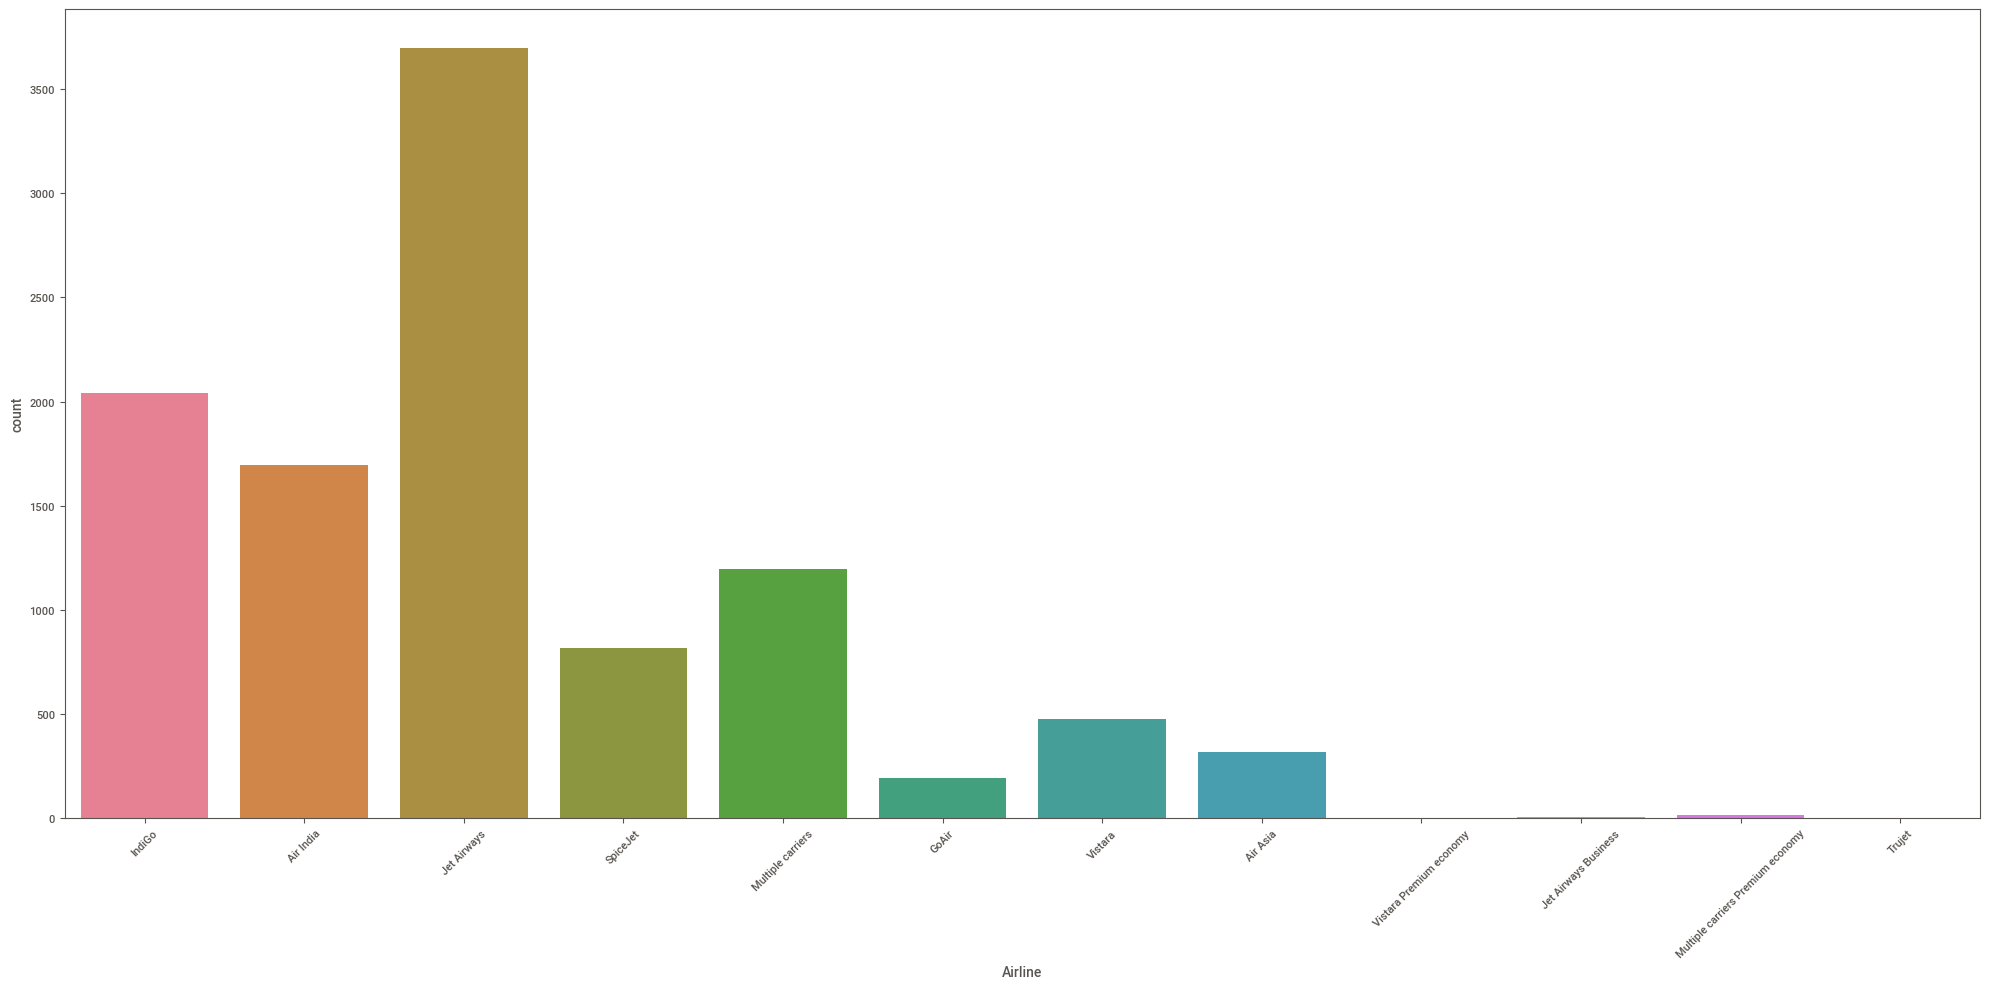

In [27]:
#bivarient analysis
plt.figure(figsize=(20,10))
sns.countplot(x='Airline',hue='Airline',data=data)
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

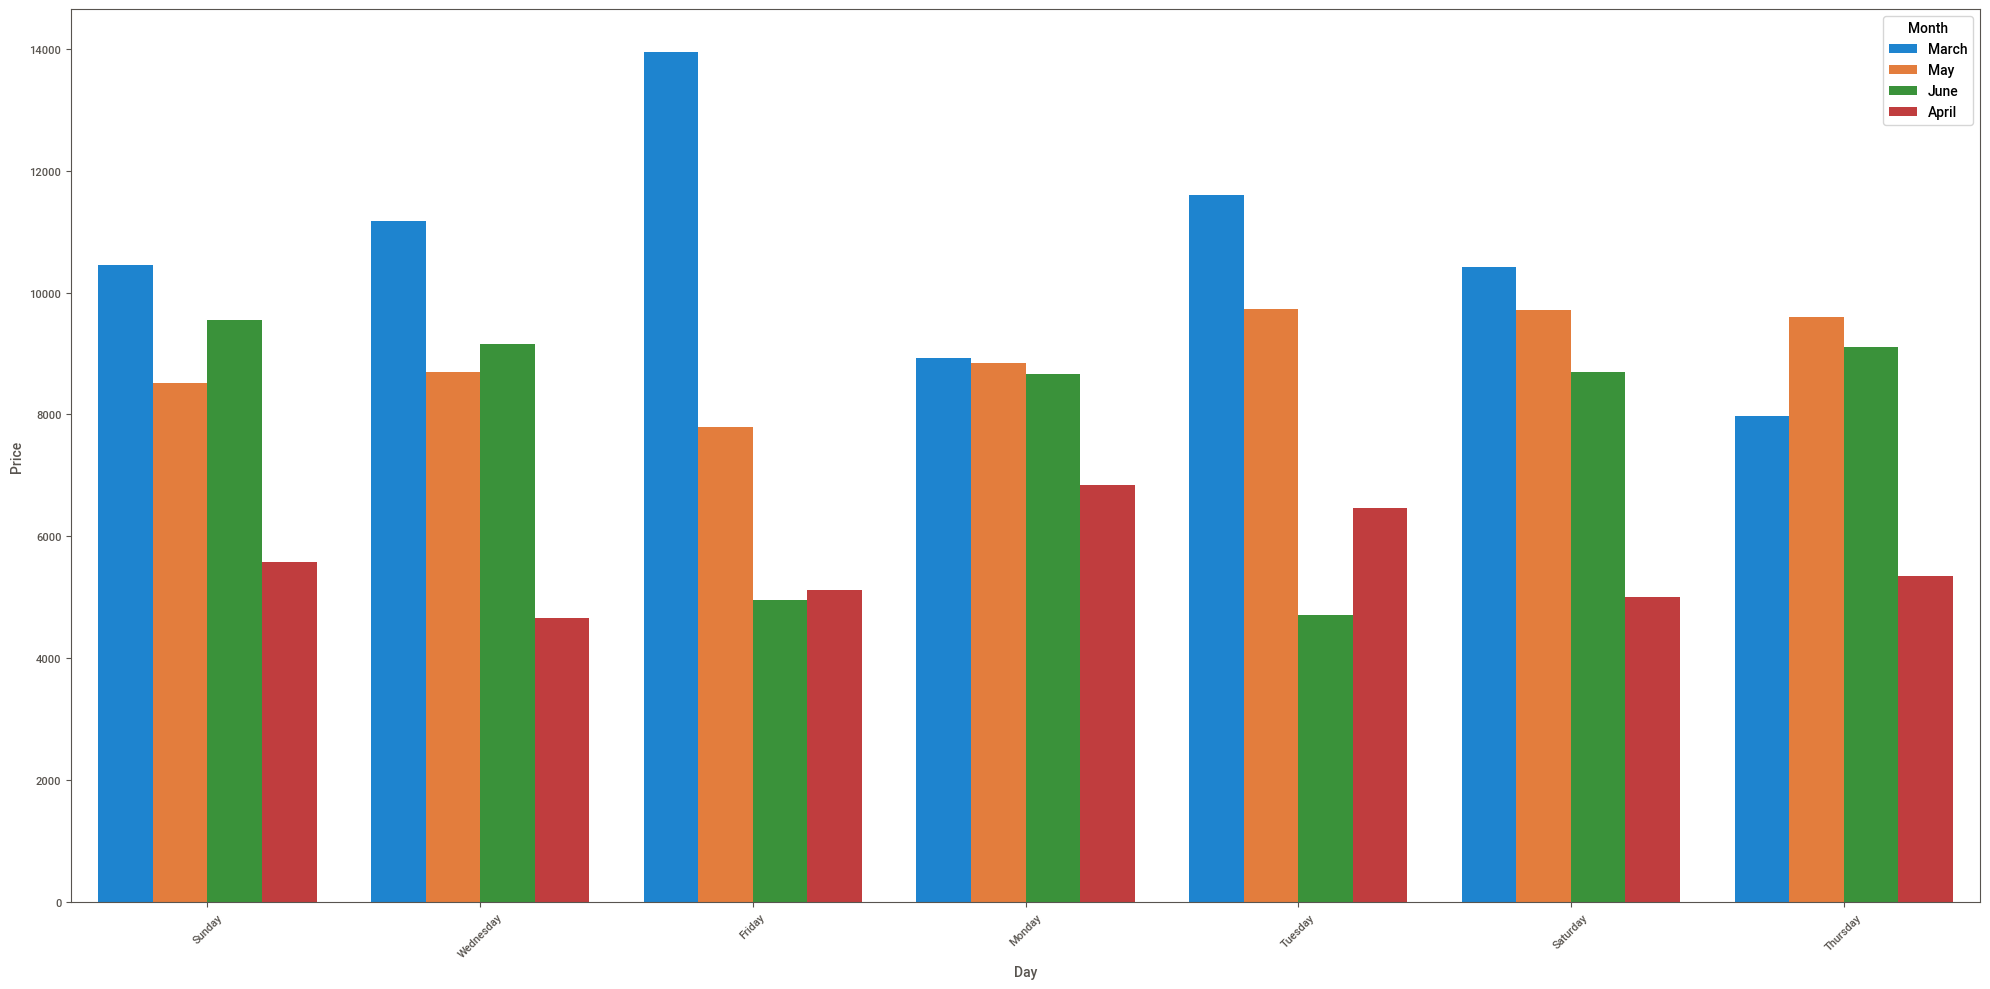

In [28]:
plt.figure(figsize=(20,10))
sns.barplot(x='Day',y='Price',data=data,errorbar=None,hue='Month')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

<Axes: xlabel='Day', ylabel='Price'>

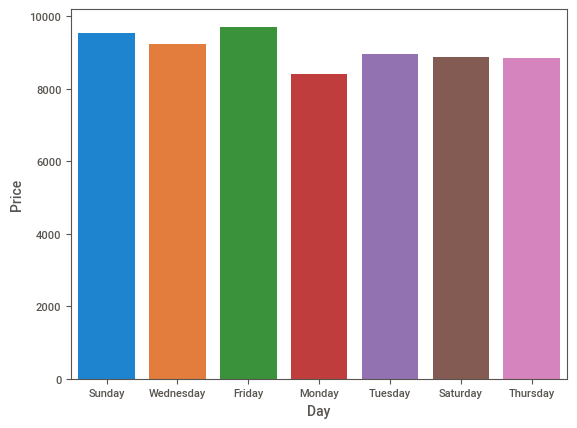

In [29]:
sns.barplot(x='Day',y='Price',data=data,errorbar=None,hue='Day')

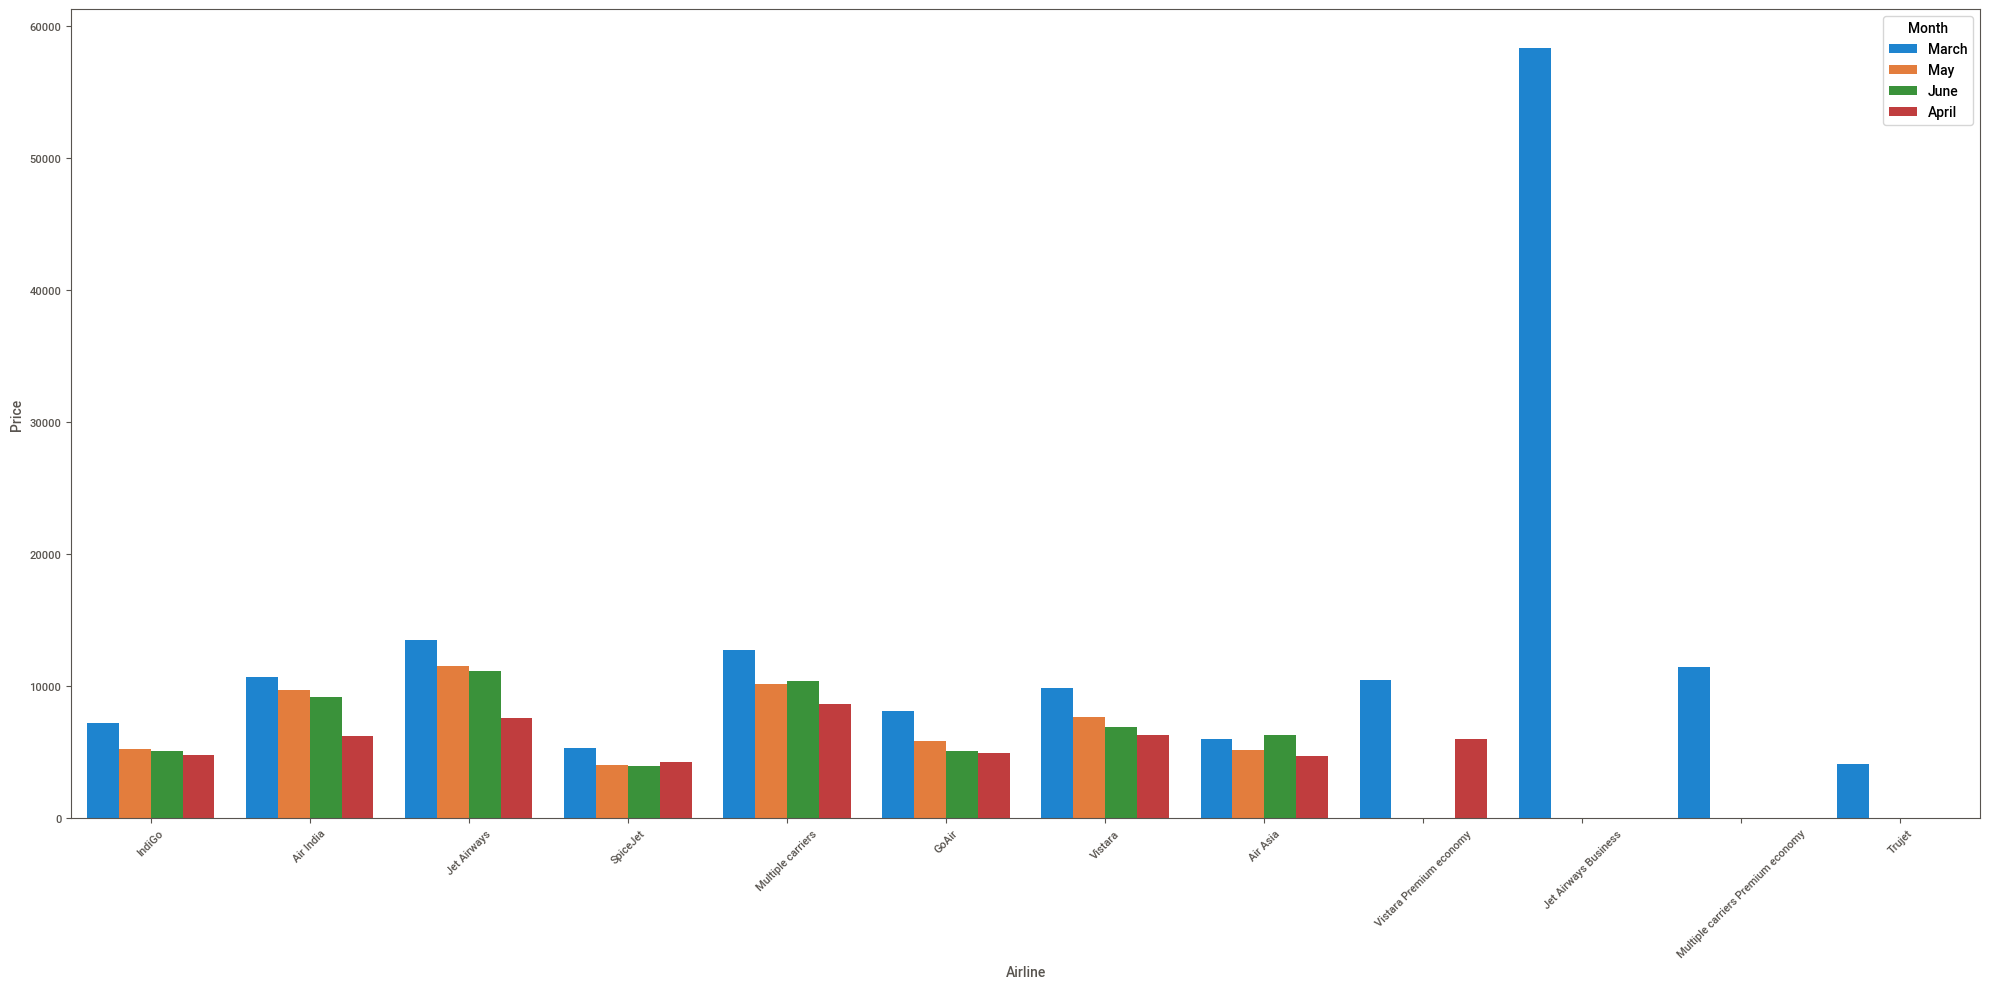

In [30]:
plt.figure(figsize=(20,10))
sns.barplot(x='Airline',y='Price',data=data,errorbar=None,hue='Month')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

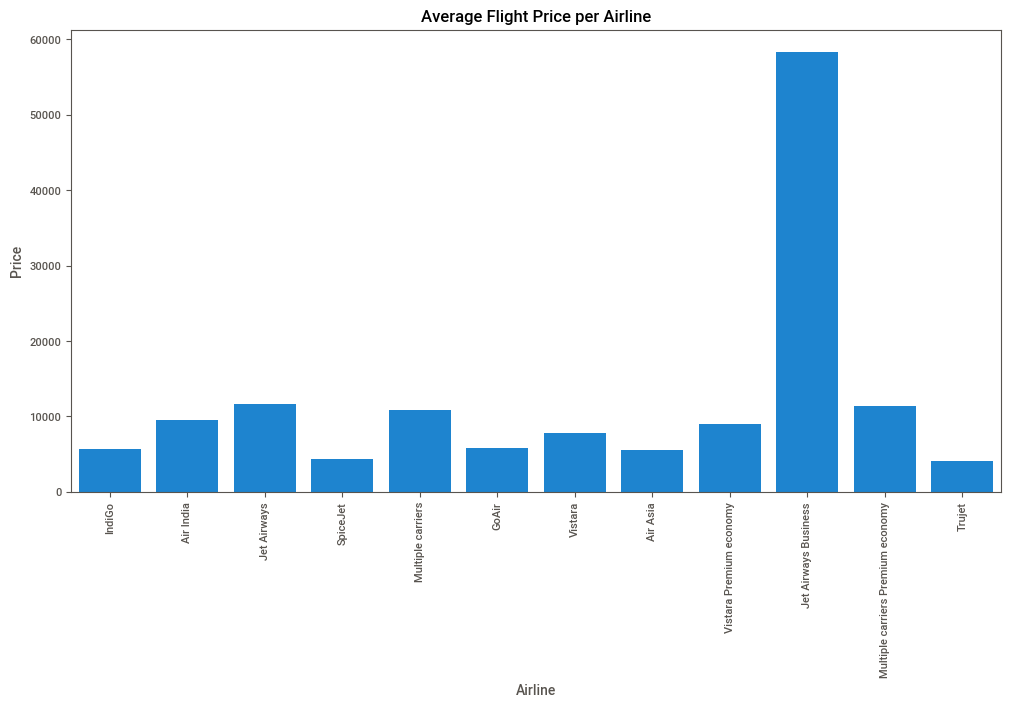

In [31]:
# Airline-wise Average Price
plt.figure(figsize=(12,6))
sns.barplot(x='Airline', y='Price', data=data, estimator=np.mean,errorbar=None)
plt.xticks(rotation=90)
plt.title("Average Flight Price per Airline")
plt.show()


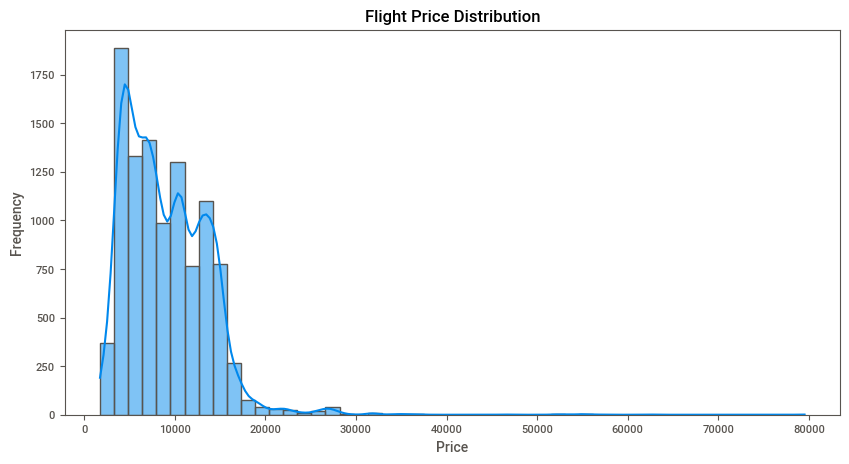

In [32]:
# Price Distribution
plt.figure(figsize=(10,5))
sns.histplot(data['Price'], bins=50, kde=True)
plt.title("Flight Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

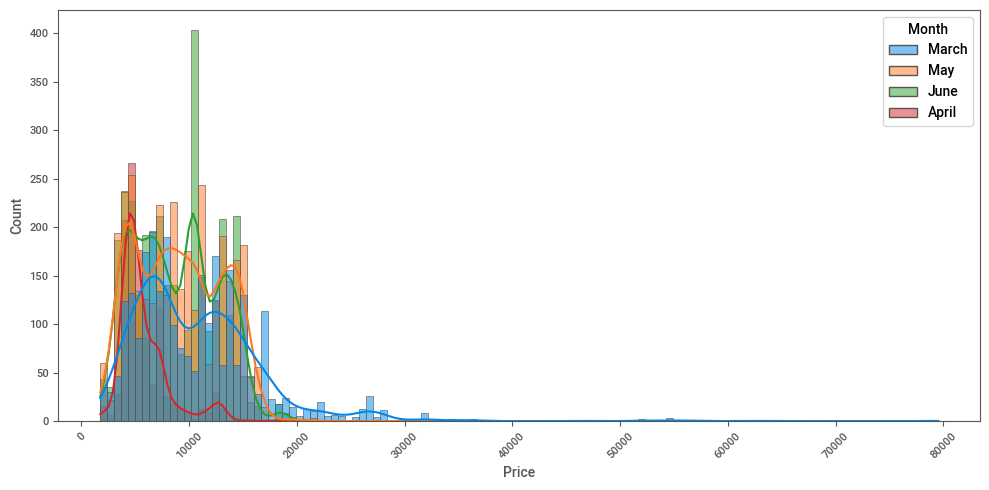

In [33]:
plt.figure(figsize=(10,5))
sns.histplot(x='Price',data=data,kde=True,hue='Month')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

<Axes: ylabel='Price'>

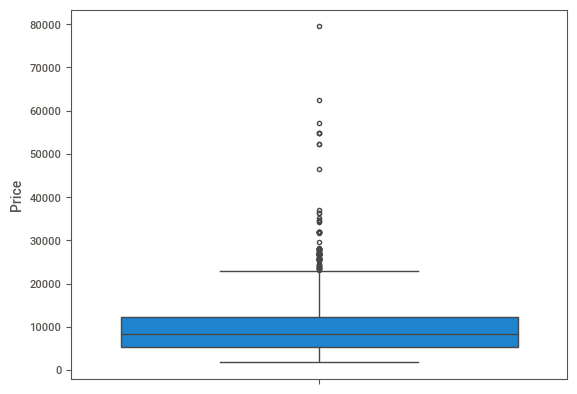

In [34]:
sns.boxplot(y=data['Price'])

<Axes: xlabel='Destination', ylabel='Price'>

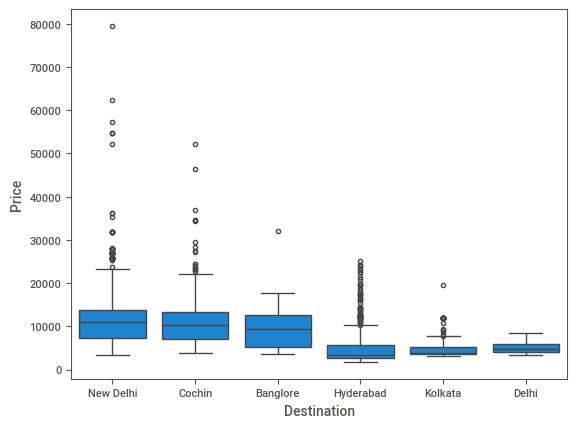

In [35]:
sns.boxplot(y = "Price", x = "Destination", data = data.sort_values("Price", ascending = False))

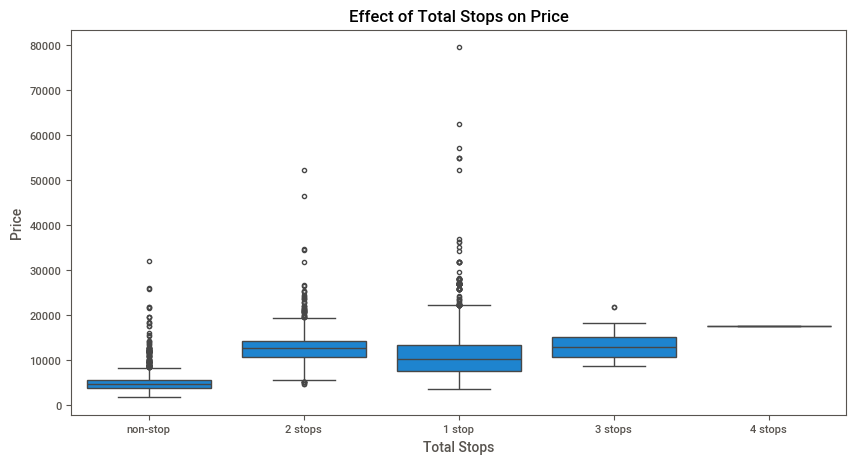

In [36]:
# Total Stops vs. Price
plt.figure(figsize=(10,5))
sns.boxplot(x='Total_Stops', y='Price', data=data)
plt.title("Effect of Total Stops on Price")
plt.xlabel("Total Stops")
plt.ylabel("Price")
plt.show()

Feature Engineering

In [37]:
data['Duration'] = data['Duration'].astype(str)
data['Duration'] = data['Duration'].str.replace("h", '*60').str.replace(' ', '+').str.replace('m', '*1').apply(eval)


In [38]:
print(data['Duration'].apply(type).value_counts())


Duration
<class 'int'>    10462
Name: count, dtype: int64


In [39]:
#converting departure time into hours and minutes
data["Dep_hour"] = pd.to_datetime(data["Dep_Time"]).dt.hour
data["Dep_min"] = pd.to_datetime(data["Dep_Time"]).dt.minute
data.drop(["Dep_Time"], axis = 1, inplace = True)

C:\Users\prasa\AppData\Local\Temp\ipykernel_11572\2125206787.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data["Dep_hour"] = pd.to_datetime(data["Dep_Time"]).dt.hour
C:\Users\prasa\AppData\Local\Temp\ipykernel_11572\2125206787.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data["Dep_min"] = pd.to_datetime(data["Dep_Time"]).dt.minute


In [40]:
#converting the arrival time into hours and minutes.
data["Arrival_hour"] = pd.to_datetime(data.Arrival_time).dt.hour
data["Arrival_min"] = pd.to_datetime(data.Arrival_time).dt.minute
data.drop(["Arrival_time"], axis = 1, inplace = True)

C:\Users\prasa\AppData\Local\Temp\ipykernel_11572\322631280.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data["Arrival_hour"] = pd.to_datetime(data.Arrival_time).dt.hour
C:\Users\prasa\AppData\Local\Temp\ipykernel_11572\322631280.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data["Arrival_min"] = pd.to_datetime(data.Arrival_time).dt.minute


In [41]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,3897,Sunday,March,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,Wednesday,May,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,13882,Sunday,June,9,25,4,25
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,No info,6218,Sunday,May,18,5,23,30
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,285,1 stop,No info,13302,Friday,March,16,50,21,35


In [42]:
data.drop('Date_of_Journey',axis=1,inplace=True)

In [43]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,3897,Sunday,March,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,Wednesday,May,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,13882,Sunday,June,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,No info,6218,Sunday,May,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1 stop,No info,13302,Friday,March,16,50,21,35


In [44]:
# Label encoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
encoder =LabelEncoder()

data['Day'] = encoder.fit_transform(data.Day)

In [45]:
data['Month'] = encoder.fit_transform(data.Month)

In [46]:
data['Additional_Info'] = encoder.fit_transform(data.Additional_Info)

In [47]:
data['Total_Stops'] = encoder.fit_transform(data.Total_Stops)

In [48]:
data['Route'] = encoder.fit_transform(data.Route)

In [49]:
data['Source'] = encoder.fit_transform(data.Source)

In [50]:
data['Destination'] = encoder.fit_transform(data.Destination)

In [51]:
data['Airline'] = encoder.fit_transform(data.Airline)

In [52]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,3,0,5,18,170,4,8,3897,3,2,22,20,1,10
1,1,3,0,84,445,1,8,7662,6,3,5,50,13,15
2,4,2,1,118,1140,1,8,13882,3,1,9,25,4,25
3,3,3,0,91,325,0,8,6218,3,3,18,5,23,30
4,3,0,5,29,285,0,8,13302,0,2,16,50,21,35


In [53]:
data.corr()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
Airline,1.000000,-0.012172,0.015942,0.029636,-0.153618,0.034396,-0.058220,-0.036491,0.006039,-0.011530,-0.032267,-0.062421,-0.005438,-0.073045
Source,-0.012172,1.000000,-0.589992,0.403884,0.162808,-0.222859,-0.021587,0.013796,0.097456,0.115145,0.060218,-0.056609,0.028257,0.021392
Destination,0.015942,-0.589992,1.000000,-0.457559,-0.254243,0.334097,0.024922,-0.065875,-0.115544,-0.008356,-0.074056,0.128523,-0.044605,0.016351
Route,0.029636,0.403884,-0.457559,1.000000,0.273200,-0.436066,0.042804,0.154374,0.107641,0.031105,-0.075188,-0.070978,0.021612,-0.174172
Duration,-0.153618,0.162808,-0.254243,0.273200,1.000000,-0.609794,-0.169939,0.501758,0.088374,0.128793,-0.001285,-0.019225,0.061912,-0.070977
Total_Stops,0.034396,-0.222859,0.334097,-0.436066,-0.609794,1.000000,0.164639,-0.571991,-0.120647,-0.149764,0.040310,0.049338,-0.099351,0.176743
Additional_Info,-0.058220,-0.021587,0.024922,0.042804,-0.169939,0.164639,1.000000,-0.068779,0.032865,-0.028000,-0.059406,-0.015916,0.021293,0.044321
Price,-0.036491,0.013796,-0.065875,0.154374,0.501758,-0.571991,-0.068779,1.000000,0.015309,0.164203,0.005155,-0.024155,0.031023,-0.086163
Day,0.006039,0.097456,-0.115544,0.107641,0.088374,-0.120647,0.032865,0.015309,1.000000,0.046791,-0.012988,-0.017237,0.004566,-0.000218
Month,-0.011530,0.115145,-0.008356,0.031105,0.128793,-0.149764,-0.028000,0.164203,0.046791,1.000000,0.008229,-0.018051,0.005584,-0.009082


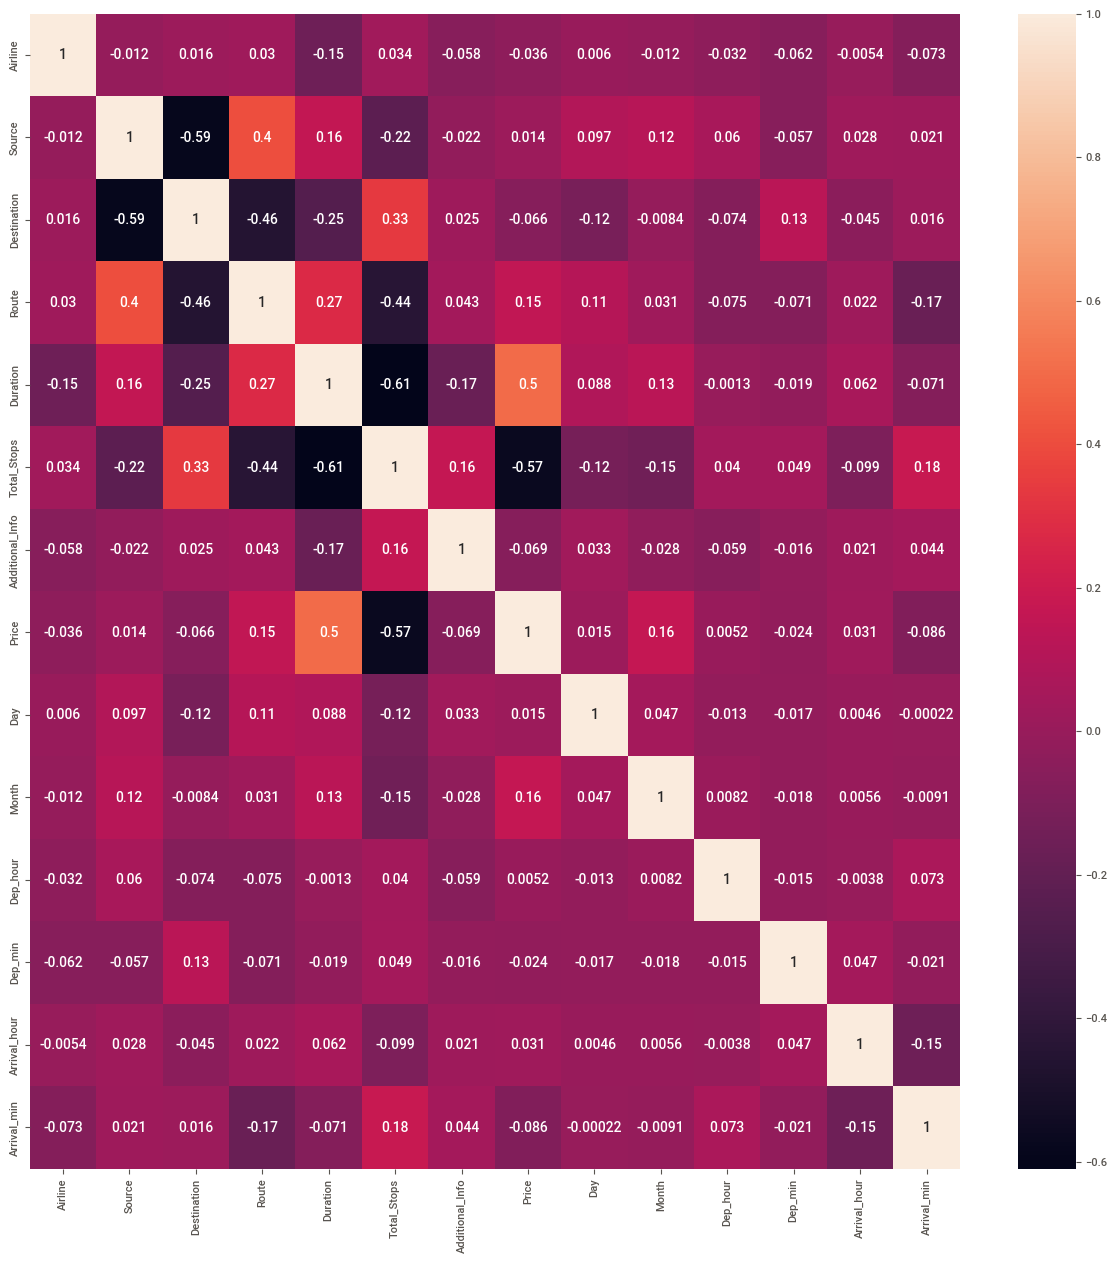

In [54]:
plt.figure(figsize = (15,15))
sns.heatmap(data.corr(), annot = True)
plt.show()

In [55]:
data.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Day', 'Month', 'Dep_hour', 'Dep_min',
       'Arrival_hour', 'Arrival_min'],
      dtype='object')

In [56]:
x=data.drop(['Price'],axis=1)

In [57]:
x

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Day,Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,3,0,5,18,170,4,8,3,2,22,20,1,10
1,1,3,0,84,445,1,8,6,3,5,50,13,15
2,4,2,1,118,1140,1,8,3,1,9,25,4,25
3,3,3,0,91,325,0,8,3,3,18,5,23,30
4,3,0,5,29,285,0,8,0,2,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,64,150,4,8,5,0,19,55,22,25
10679,1,3,0,64,155,4,8,2,0,20,45,23,20
10680,4,0,2,18,180,4,8,2,0,8,20,11,20
10681,10,0,5,18,160,4,8,0,2,11,30,14,10


In [58]:
y=data['Price']

In [59]:
!pip install xgboost

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [61]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [62]:
# Train Models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    "Decision Tree": DecisionTreeRegressor(random_state=42)
}

In [63]:
# Evaluate Models
results = {}
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    results[name] = {
        "MAE": mean_absolute_error(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
        "R2 Score": r2_score(y_test, y_pred)
    }
    print(f"\nModel: {name}")
    print("MAE:", results[name]["MAE"])
    print("RMSE:", results[name]["RMSE"])
    print("R2 Score:", results[name]["R2 Score"])


Model: Linear Regression
MAE: 2531.2622295542956
RMSE: 3511.531323474636
R2 Score: 0.4086000582319007

Model: Random Forest
MAE: 904.6223644292613
RMSE: 1919.4113540206158
R2 Score: 0.8233049826693515

Model: Gradient Boosting
MAE: 1415.862289356245
RMSE: 2248.729869061927
R2 Score: 0.7574715110554013

Model: XGBoost
MAE: 1045.9337861580082
RMSE: 1815.4081737400018
R2 Score: 0.8419346210310191

Model: Decision Tree
MAE: 1027.1858576206403
RMSE: 2319.3490064379266
R2 Score: 0.7419995919399727


In [ ]:
# Compare Model Performance
results_df = pd.DataFrame(results).T
print("\nModel Performance Summary:")
print(results_df)


Model Performance Summary:
                           MAE         RMSE  R2 Score
Linear Regression  2531.262230  3511.531323  0.408600
Random Forest       904.622364  1919.411354  0.823305
Gradient Boosting  1415.862289  2248.729869  0.757472
XGBoost            1045.933786  1815.408174  0.841935
Decision Tree      1027.185858  2319.349006  0.742000
